In [ ]:
# Résumé comparatif des orchestrateurs
import sys
from pathlib import Path

# Ajouter le répertoire racine au path pour les imports
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

print(f"Project root: {project_root}")
print(f"Current working directory: {Path.cwd()}")
print("=== RÉSUMÉ COMPARATIF DES ORCHESTRATEURS ===")

print("""
🔹 SIMPLE ORCHESTRATOR
-------------------------------
✅ Fonctionnalités:
- Traitement de requêtes avec RAG ou réponse directe
- Support des images, tables et texte
- Cache joblib pour optimisation
- Mémoire conversationnelle
- Mode streaming
- Vérification des chunks
- Retry avec exponential backoff
- Fallback entre providers

📊 Avantages:
- Facile à utiliser et comprendre
- Optimisé pour la performance
- Gestion robuste des erreurs
- Streaming pour l'UX

🔹 MODULAR ORCHESTRATOR
-------------------------------
✅ Fonctionnalités:
- Architecture modulaire avec services dédiés
- Routage intelligent vs traditionnel
- Recherche par réglementation spécifique
- Comparaison entre réglementations
- Reranking avancé
- Validation modulaire
- Informations de routage détaillées

📊 Avantages:
- Architecture plus flexible
- Routage intelligent sophistiqué
- Recherches ciblées par réglementation
- Extensibilité facilite la maintenance
- Meilleure séparation des responsabilités

🎯 RECOMMANDATIONS D'USAGE:
-------------------------------
• SimpleOrchestrator: Pour usage général, prototypage rapide, déploiement simple
• ModularOrchestrator: Pour applications complexes, recherches spécialisées, évolutivité

🔧 CONFIGURATION RECOMMANDÉE:
-------------------------------
• Pour dev/test: SimpleOrchestrator avec cache désactivé
• Pour production: ModularOrchestrator avec routage avancé
• Pour performance: SimpleOrchestrator avec cache joblib
• Pour flexibilité: ModularOrchestrator avec services personnalisés
""")

print("\n✅ Analyse comparative terminée")

In [ ]:
# Test du ModularOrchestrator
try:
    from assistant_regulation.planning.Orchestrator.modular_orchestrator import ModularOrchestrator
    
    # Initialisation du ModularOrchestrator
    print("Initialisation du ModularOrchestrator...")
    modular_orchestrator = ModularOrchestrator(
        llm_provider="mistral",
        model_name="mistral-large-latest",
        enable_verification=False  # Désactiver pour le test
    )
    
    print("✅ ModularOrchestrator initialisé avec succès")
    
    # Test avec routage traditionnel
    print("\n--- Test avec routage traditionnel ---")
    query_modular = "What are the fire safety requirements for buses?"
    
    response_traditional = modular_orchestrator.process_query(
        query_modular,
        use_images=True,
        use_tables=True,
        top_k=3,
        use_advanced_routing=False  # Routage traditionnel
    )
    
    print(f"Réponse traditionnelle: {response_traditional['answer'][:150]}...")
    print(f"Sources: {len(response_traditional.get('sources', []))}")
    
    # Test avec routage avancé
    print("\n--- Test avec routage avancé ---")
    response_advanced = modular_orchestrator.process_query(
        query_modular,
        use_images=True,
        use_tables=True,
        top_k=3,
        use_advanced_routing=True  # Routage avancé
    )
    
    print(f"Réponse avancée: {response_advanced['answer'][:150]}...")
    print(f"Sources: {len(response_advanced.get('sources', []))}")
    for source in response_advanced.get('sources', []):
        print(f"Source: {source['document']}")
        print(f"Page: {source['page']}")
        print(f"Source Link: {source['source_link']}")
        print("-" * 50)
    # Informations de routage
    if 'routing_info' in response_advanced:
        routing_info = response_advanced['routing_info']
        print(f"Stratégie de routage: {routing_info.get('strategy', 'N/A')}")
        print(f"Confiance: {routing_info.get('confidence', 'N/A')}")
        print(f"Raisonnement: {routing_info.get('reasoning', 'N/A')[:100]}...")
    
    # Test des informations de routage
    print("\n--- Test des informations de routage ---")
    routing_info = modular_orchestrator.get_routing_info(query_modular)
    print(f"Info de routage: {routing_info}")
    
    explanation = modular_orchestrator.explain_routing_decision(query_modular)
    print(f"Explication: {explanation[:200]}...")
    
    print("\n✅ Tests du ModularOrchestrator terminés avec succès")
    
except Exception as e:
    print(f"❌ Erreur lors du test du ModularOrchestrator: {str(e)}")
    import traceback
    traceback.print_exc()

In [ ]:
# Test d'intégration global
print("=== TEST D'INTÉGRATION GLOBAL ===")


def test_orchestrator_integration():
    """Test complet de l'orchestrateur modulaire"""
    
    # Liste de requêtes de test
    test_queries = [
        "What are the emergency exit requirements?",
        "Seat dimensions and spacing requirements?",
        "Fire safety regulations for buses?",
        "Hello, how are you today?",  # Question générale
        "What is the weather like?"   # Question générale
    ]
    
    results = []
    
    for i, query in enumerate(test_queries):
        print(f"\n--- Test {i+1}: {query} ---")
        
        try:
            start_time = time.time()
            orchestrator = ModularOrchestrator(
                llm_provider="mistral",
                model_name="mistral-large-latest",
                enable_verification=False  # Désactiver pour le test
            )
            
            # Traitement de la requête
            response = orchestrator.process_query(
                query=query,
                use_images=True,
                use_tables=True,
                top_k=3
            )
            
            processing_time = time.time() - start_time
            
            # Collecte des résultats
            result = {
                "query": query,
                "success": True,
                "processing_time": processing_time,
                "answer_length": len(response.get('answer', '')),
                "sources_count": len(response.get('sources', [])),
                "images_count": len(response.get('images', [])),
                "tables_count": len(response.get('tables', [])),
                "query_type": response.get('analysis', {}).get('query_type', 'unknown'),
                "needs_rag": response.get('analysis', {}).get('needs_rag', False)
            }
            
            results.append(result)
            
            print(f"✅ Succès - Temps: {processing_time:.2f}s")
            print(f"   Type: {result['query_type']}, RAG: {result['needs_rag']}")
            print(f"   Réponse: {response['answer'][:100]}...")
            
        except Exception as e:
            print(f"❌ Erreur: {str(e)}")
            results.append({
                "query": query,
                "success": False,
                "error": str(e)
            })
    
    return results

# Exécution du test d'intégration
integration_results = test_orchestrator_integration()

# Affichage du résumé
print("\n=== RÉSUMÉ DES TESTS D'INTÉGRATION ===")
successful_tests = sum(1 for r in integration_results if r.get('success', False))
total_tests = len(integration_results)

print(f"Tests réussis: {successful_tests}/{total_tests}")

if successful_tests > 0:
    avg_time = sum(r.get('processing_time', 0) for r in integration_results if r.get('success', False)) / successful_tests
    print(f"Temps moyen de traitement: {avg_time:.2f}s")
    
    # Statistiques par type de requête
    rag_queries = sum(1 for r in integration_results if r.get('needs_rag', False))
    general_queries = sum(1 for r in integration_results if not r.get('needs_rag', True))
    
    print(f"Requêtes RAG: {rag_queries}")
    print(f"Requêtes générales: {general_queries}")

print("\n✅ Test d'intégration terminé")

In [ ]:
# Test des retrievers individuels
print("=== TEST DES RETRIEVERS INDIVIDUELS ===")
from assistant_regulation.planning.Orchestrator.modular_orchestrator import ModularOrchestrator

orchestrator = ModularOrchestrator(
    llm_provider="mistral",
    model_name="mistral-large-latest",
    enable_verification=False  # Désactiver pour le test
)

# Test du text retriever
print("\n1. Test du TextRetriever")
query_test = "seat requirements"
text_results = orchestrator.retrieval_service.text_retriever.search_with_context(query_test, top_k=3)
print(f"TextRetriever - Résultats: {len(text_results)}")
if text_results:
    print(f"Premier résultat: {text_results[0]}")

# Test du table retriever
print("\n2. Test du TableRetriever")
table_results = orchestrator.retrieval_service.table_retriever.search(query_test, top_k=3)
print(f"TableRetriever - Résultats: {len(table_results)}")
if table_results:
    print(f"Premier tableau: {str(table_results[0])[:100]}...")

# Test du image retriever
print("\n3. Test du ImageRetriever")
try:
    image_results = orchestrator.retrieval_service.image_retriever.search(query_test, top_k=3)
    print(f"ImageRetriever - Résultats: {len(image_results)}")
    if image_results:
        print(f"Première image: {str(image_results[0])[:100]}...")
except Exception as e:
    print(f"Erreur ImageRetriever: {str(e)}")

# Test des réglementations disponibles
print("\n4. Test des réglementations disponibles")
try:
    regulations = orchestrator.retrieval_service.text_retriever.get_available_regulations()
    print(f"Réglementations disponibles: {regulations}")
except Exception as e:
    print(f"Erreur lors de la récupération des réglementations: {str(e)}")

print("\n✅ Test des retrievers terminé")

In [ ]:
# Test avec cache et vérification activés
print("=== TEST AVEC CACHE ET VÉRIFICATION ===")
from assistant_regulation.planning.Orchestrator.orchestrator_2 import SimpleOrchestrator
# Initialisation avec toutes les fonctionnalités
orchestrator_full = SimpleOrchestrator(
    llm_provider="mistral",
    model_name="mistral-large-latest",
    enable_verification=True,   # Activer la vérification
    use_joblib_cache=True,      # Activer le cache
    enable_conversation_memory=True  # Activer la mémoire
)

print("✅ Orchestrateur complet initialisé")
print(f"Cache stats: {orchestrator_full.get_cache_stats()}")

# Test avec une requête différente
query_full = "What are the dimensions of emergency exit doors?"

print(f"\nRequête: {query_full}")
print("Traitement avec toutes les fonctionnalités...")

try:
    import time
    start_time = time.time()
    
    response_full = orchestrator_full.process_query(
        query=query_full,
        use_images=True,
        use_tables=True,
        top_k=5
    )
    
    end_time = time.time()
    processing_time = end_time - start_time
    
    print(f"\n=== RÉSULTAT COMPLET ===")
    print(f"Temps de traitement: {processing_time:.2f} secondes")
    print(f"Réponse: {response_full['answer'][:200]}...")
    print(f"Sources: {len(response_full.get('sources', []))}")
    print(f"Images: {len(response_full.get('images', []))}")
    print(f"Tables: {len(response_full.get('tables', []))}")
    
    # Statistiques de conversation
    conv_stats = orchestrator_full.get_conversation_stats()
    print(f"\nStats conversation: {conv_stats}")
    
except Exception as e:
    print(f"❌ Erreur: {str(e)}")
    import traceback
    traceback.print_exc()

In [ ]:
# Test du mode streaming
print("=== TEST DU MODE STREAMING ===")
query_stream = "What are the regulatory requirements for emergency exits?"

print(f"Requête streaming: {query_stream}")
print("Traitement en mode streaming...")

try:
    # Génération de réponse en streaming
    response_parts = []
    for chunk in orchestrator.process_query_stream(
        query=query_stream,
        use_images=True,
        use_tables=True,
        top_k=3
    ):
        if chunk["type"] == "analysis":
            print(f"📊 Analyse: {chunk['content']}")
        elif chunk["type"] == "search_complete":
            content = chunk["content"]
            print(f"🔍 Recherche terminée:")
            print(f"  - Sources: {len(content['sources'])}")
            print(f"  - Images: {len(content['images'])}")
            print(f"  - Tables: {len(content['tables'])}")
        elif chunk["type"] == "text":
            response_parts.append(chunk["content"])
            print(chunk["content"], end="", flush=True)
        elif chunk["type"] == "error":
            print(f"❌ Erreur: {chunk['content']}")
            break
        elif chunk["type"] == "done":
            print("\n✅ Traitement terminé")
            break
    
    full_response = "".join(response_parts)
    print(f"\n=== RÉPONSE COMPLÈTE ===")
    print(full_response)
    
except Exception as e:
    print(f"❌ Erreur streaming: {str(e)}")
    import traceback
    traceback.print_exc()

In [ ]:
# Test du ModularOrchestrator
try:
    from src.Planning_pattern.sync.modular_orchestrator import ModularOrchestrator
    
    # Initialisation du ModularOrchestrator
    print("Initialisation du ModularOrchestrator...")
    modular_orchestrator = ModularOrchestrator(
        llm_provider="mistral",
        model_name="mistral-large-latest",
        enable_verification=False  # Désactiver pour le test
    )
    
    print("✅ ModularOrchestrator initialisé avec succès")
    
    # Test avec routage traditionnel
    print("\n--- Test avec routage traditionnel ---")
    query_modular = "What are the fire safety requirements for buses?"
    
    response_traditional = modular_orchestrator.process_query(
        query_modular,
        use_images=True,
        use_tables=True,
        top_k=3,
        use_advanced_routing=False  # Routage traditionnel
    )
    
    print(f"Réponse traditionnelle: {response_traditional['answer'][:150]}...")
    print(f"Sources: {len(response_traditional.get('sources', []))}")
    
    # Test avec routage avancé
    print("\n--- Test avec routage avancé ---")
    response_advanced = modular_orchestrator.process_query(
        query_modular,
        use_images=True,
        use_tables=True,
        top_k=3,
        use_advanced_routing=True  # Routage avancé
    )
    
    print(f"Réponse avancée: {response_advanced['answer'][:150]}...")
    print(f"Sources: {len(response_advanced.get('sources', []))}")
    
    # Informations de routage
    if 'routing_info' in response_advanced:
        routing_info = response_advanced['routing_info']
        print(f"Stratégie de routage: {routing_info.get('strategy', 'N/A')}")
        print(f"Confiance: {routing_info.get('confidence', 'N/A')}")
        print(f"Raisonnement: {routing_info.get('reasoning', 'N/A')[:100]}...")
    
    # Test des informations de routage
    print("\n--- Test des informations de routage ---")
    routing_info = modular_orchestrator.get_routing_info(query_modular)
    print(f"Info de routage: {routing_info}")
    
    explanation = modular_orchestrator.explain_routing_decision(query_modular)
    print(f"Explication: {explanation[:200]}...")
    
    print("\n✅ Tests du ModularOrchestrator terminés avec succès")
    
except Exception as e:
    print(f"❌ Erreur lors du test du ModularOrchestrator: {str(e)}")
    import traceback
    traceback.print_exc()

In [ ]:
# Test d'une requête simple
print("=== TEST D'UNE REQUÊTE SIMPLE ===")
query = "What are the minimum distances required between passenger seats?"

# Processus de traitement
print(f"Requête: {query}")
print("Traitement en cours...")

try:
    response = orchestrator.process_query(
        query=query,
        use_images=True,
        use_tables=True,
        top_k=3
    )
    
    print("\n=== RÉSULTAT ===")
    print(f"Réponse: {response['answer']}")
    print(f"Nombre de sources: {len(response.get('sources', []))}")
    print(f"Nombre d'images: {len(response.get('images', []))}")
    print(f"Nombre de tableaux: {len(response.get('tables', []))}")
    
    # Analyse de la requête
    if 'analysis' in response:
        analysis = response['analysis']
        print(f"\nAnalyse de la requête:")
        print(f"  - Type: {analysis.get('query_type', 'N/A')}")
        print(f"  - Nécessite RAG: {analysis.get('needs_rag', 'N/A')}")
        
except Exception as e:
    print(f"❌ Erreur: {str(e)}")
    import traceback
    traceback.print_exc()

In [ ]:
# Test du SimpleOrchestrator
import sys
import os
sys.path.append(os.path.abspath(r"c:\\Projet_AI\\Assistant_regulation"))

from src.Planning_pattern.sync.orchestrator_2 import SimpleOrchestrator

# Initialisation avec configuration simple
print("=== INITIALISATION DU SIMPLE ORCHESTRATOR ===")
orchestrator = SimpleOrchestrator(
    llm_provider="mistral",
    model_name="mistral-large-latest",
    enable_verification=False,  # Désactiver la vérification pour le test
    use_joblib_cache=False,     # Désactiver le cache pour le test
    enable_conversation_memory=False  # Désactiver la mémoire pour le test
)

print("✅ Orchestrateur initialisé avec succès")
print(f"Provider: {orchestrator.llm_provider}")
print(f"Model: {orchestrator.model_name}")
print(f"Verification: {orchestrator.enable_verification}")

## Test du modul de traitement de données 

In [1]:
import sys
import os
# Ajouter le chemin vers le répertoire parent du notebook
sys.path.append(os.path.abspath(r"c:\\Projet_AI\\Assistant_regulation"))

In [2]:
print(sys.path)

['c:\\Users\\V31822B\\AppData\\Local\\Programs\\Python\\Python313\\python313.zip', 'c:\\Users\\V31822B\\AppData\\Local\\Programs\\Python\\Python313\\DLLs', 'c:\\Users\\V31822B\\AppData\\Local\\Programs\\Python\\Python313\\Lib', 'c:\\Users\\V31822B\\AppData\\Local\\Programs\\Python\\Python313', '', 'C:\\Users\\V31822B\\AppData\\Roaming\\Python\\Python313\\site-packages', 'C:\\Users\\V31822B\\AppData\\Roaming\\Python\\Python313\\site-packages\\win32', 'C:\\Users\\V31822B\\AppData\\Roaming\\Python\\Python313\\site-packages\\win32\\lib', 'C:\\Users\\V31822B\\AppData\\Roaming\\Python\\Python313\\site-packages\\Pythonwin', 'c:\\Users\\V31822B\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages', 'C:\\AGENTIC_AI', 'c:\\Projet_AI\\Assistant_regulation']


## Preprocessing et chunking

In [25]:
import assistant_regulation.processing.Modul_Process.chunking_utils as chunking_utils
import assistant_regulation.processing.Modul_Process.chunking_table as chunking_table
import assistant_regulation.processing.Modul_Process.chunking_image as chunking_image
import assistant_regulation.processing.Modul_Process.chunking_text as chunking_text

# Import the necessary functions
table= chunking_table.extract_tables
Image= chunking_image.pdf_to_image_chunks
text= chunking_text.hybrid_chunk_document
# Process a sample PDF file
#result = chunking_utils.process_pdf_directory(r"c:\\Projet_AI\\Assistant_regulation\\assets",table)
result_text = chunking_utils.process_pdf_directory(r"c:\\Projet_AI\\Assistant_regulation\\assets",text)
#result_img = chunking_utils.process_pdf_directory(r"c:\\Projet_AI\\Assistant_regulation\\Data",Image)
#result_image = [describ_image.enrich_chunk_with_context(chunk) for chunk in result_img]
#print(result_image)

INFO:datasets:PyTorch version 2.6.0 available.
INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: cpu
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:assistant_regulation.processing.Modul_Process.chunking_text:Late Chunker initialisé avec all-MiniLM-L6-v2
INFO:assistant_regulation.processing.Modul_Process.chunking_text:Début Late Chunking: c:\Projet_AI\Assistant_regulation\assets\R046 - 06 series.pdf
INFO:assistant_regulation.processing.Modul_Process.chunking_text:Texte extrait: 193335 caractères de 89 pages
Token indices sequence length is longer than the specified maximum sequence length for this model (721 > 256). Running this sequence through the model will result in indexing errors


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:assistant_regulation.processing.Modul_Process.chunking_text:Late Chunking terminé: 30 chunks en 4.87s


In [26]:
result_text

[{'chunk_id': 'chunk_1',
  'text': '1. Scope 1.1. This Regulation applies: (a) To compulsory and optional devices for indirect vision, set out in the table under paragraph 15.2.1.1.1. of this Regulation for vehicles of category M and N1 and to compulsory and optional devices for indirect vision mentioned in paragraphs 15.2.1.1.3. and 15.2.1.1.4. of this Regulation for vehicles of category L1 with bodywork at least partly enclosing the driver; (b) To the installation of devices for indirect visions on vehicles of categories M and N and on vehicles of category L1 with bodywork at least partly enclosing the driver. 1.2. This Regulation does not apply to devices other than those prescribed under paragraph 1.1.(a) and their installation, for observing the vision area(s) immediately adjacent to the front and/or the passenger\'s side of vehicles of category M1, M2, M3, N1 and N2 ≤ 7.5 t. I. Devices for indirect vision 2. Definitions For the purposes of this Regulation: 2.1. "Devices for indir

In [ ]:
import os,logging
import assistant_regulation.processing.Modul_Process.chunking_text as chunking_text
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
source_path = r"c:\\Projet_AI\\Assistant_regulation\\assets\\R107 - 10 series.pdf"
    
if os.path.exists(source_path):
    logger.info("Test du chunking amélioré...")
    chunks = chunking_text.hybrid_chunk_document(
        source_path=source_path,
        max_tokens=1024,
        enable_validation=True,
        enable_deduplication=True
    )
    
    print(f"\n=== RÉSULTATS ===")
    print(f"Nombre de chunks: {len(chunks)}")
    
    if chunks:
        print(f"\nExemple de chunk:")
        chunk = chunks[0]
        print(f"ID: {chunk['chunk_id']}")
        print(f"Qualité: {chunk['chunk_quality']}")
        print(f"Position: {chunk['chunk_position']}")
        print(f"Type: {chunk['content_type']}")
        print(f"Régulation: {chunk['regulation_code']}")
        print(f"Texte (100 premiers chars): {chunk['text'][:100]}...")
        
        # Statistiques de qualité
        qualities = [c['chunk_quality'] for c in chunks]
        print(f"\nQualité moyenne: {sum(qualities)/len(qualities):.3f}")
        print(f"Qualité min/max: {min(qualities):.3f}/{max(qualities):.3f}")
else:
    logger.error(f"Document test non trouvé: {source_path}")

## Generation d'embbeding

### importation  des librairy

In [2]:

from assistant_regulation.processing.Modul_emb.ImageRetriever import ImageRetriever
from assistant_regulation.processing.Modul_emb.TableRetriever import TableRetriever
from assistant_regulation.processing.Modul_emb.TextRetriever import HierarchicalTextRetriever
from assistant_regulation.processing.Modul_verif.verif_agent import VerifAgent



### Initialisation et creations des embbedings

In [3]:
# Initialize the retriever
retriever_image = ImageRetriever()
retriever_table = TableRetriever()
retriever_text = HierarchicalTextRetriever()
#agent_verif = VerifAgent(model_name="mistral", temperature=0.0)


In [11]:
retriever_table.client.delete_collection("pdf_tables")

In [ ]:
# create and save the embeddings
#retriever_image.store_chunks(result_image)
retriever_table.store_chunks(result)
retriever_text.store_chunks(result_text)

In [8]:
chunking_table = retriever_table.search("What are the dimensions of the regulatory catwalk mannequins?", top_k=10)

In [23]:
chunks_text = retriever_text.search_by_content_type("What are the dimensions of the regulatory catwalk mannequins?",content_type="definition", top_k=10)

In [5]:
chunks_image = retriever_image.search("What are the dimensions of the regulatory catwalk mannequins?", top_k=3)

In [20]:
all_chunks = retriever_image.get_all_chunks_for_regulation("R124")

In [14]:
results = retriever_text.get_available_regulations()

In [24]:
chunks_text

[{'type': 'late_chunker',
  'document': 'R058 - 03 Suppl 03.pdf',
  'regulation': 'R058',
  'page': 0,
  'pages': [],
  'content': '19. Signature ................................................................................................................................. 20. The following documents, bearing the approval number shown above, are available upon request: drawings, diagrams and layout plans of the components of the structure considered to be of importance for the purposes of this Regulation; detailed information about the devices representing the vehicle structures used for the mounting of the RUPD (e.g. moment of inertia of the beams); where applicable drawings of the protective devices and their position on the vehicle. ________________________ 1/ Distinguishing number of the country which has granted/extended/refused/withdrawn approval (see approval provisions in the Regulation). 2/ Strike out what does not apply.\n',
  'score': 0.0,
  'chunk_index': 17,
  'chunk_pos

[{'id': '505b7ace-3b7e-46d2-9f34-badc3823ece7',
  'metadata': {'width': 0,
   'regulation_code': 'R124',
   'confidence': 0.5,
   'image_hash': '8df80880c7b96e120db84557a2e2a2c7',
   'document_source': 'Data\\R124 - 00 Suppl 03.pdf',
   'document_name': 'R124 - 00 Suppl 03.pdf',
   'format': 'png',
   'height': 0,
   'type': 'image',
   'unique_colors': 256,
   'text_score': 0.498,
   'size_bytes': 34036,
   'image_type': 'technical',
   'quality_score': 0.752,
   'image_url': '',
   'geometric_shapes': 4,
   'has_text': 'True',
   'page': 3},
  'documents': 'Image page 3 - Type: technical - Qualité: 0.75 - Texte: Oui - L\'image fournie est un schéma technique extrait d\'un document de réglementation automobile UN/ECE, spécifiquement la norme UN R 124 - Suppl. 3 à 00 série. Ce schéma technique se concentre sur les spécifications et les dimensions d\'une roue automobile, en particulier les termes techniques tels que "Inset/outset/zeroset" et "Dynamic radius".\n\n### Dimensions et Mesure
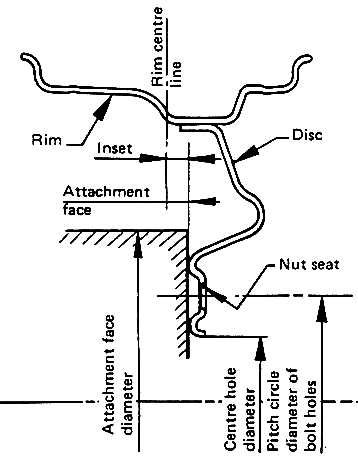
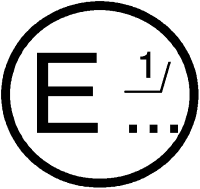
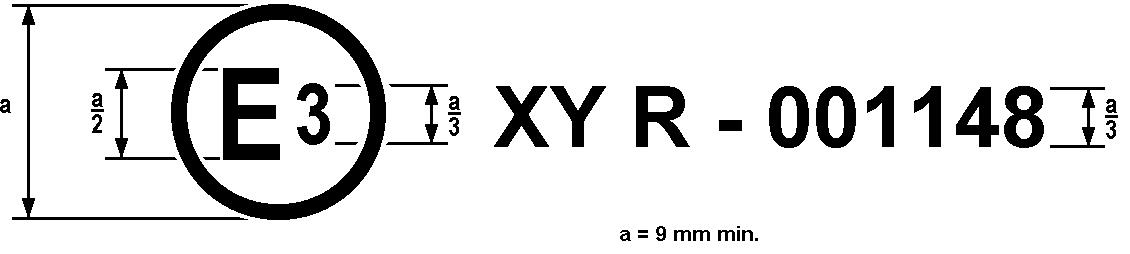
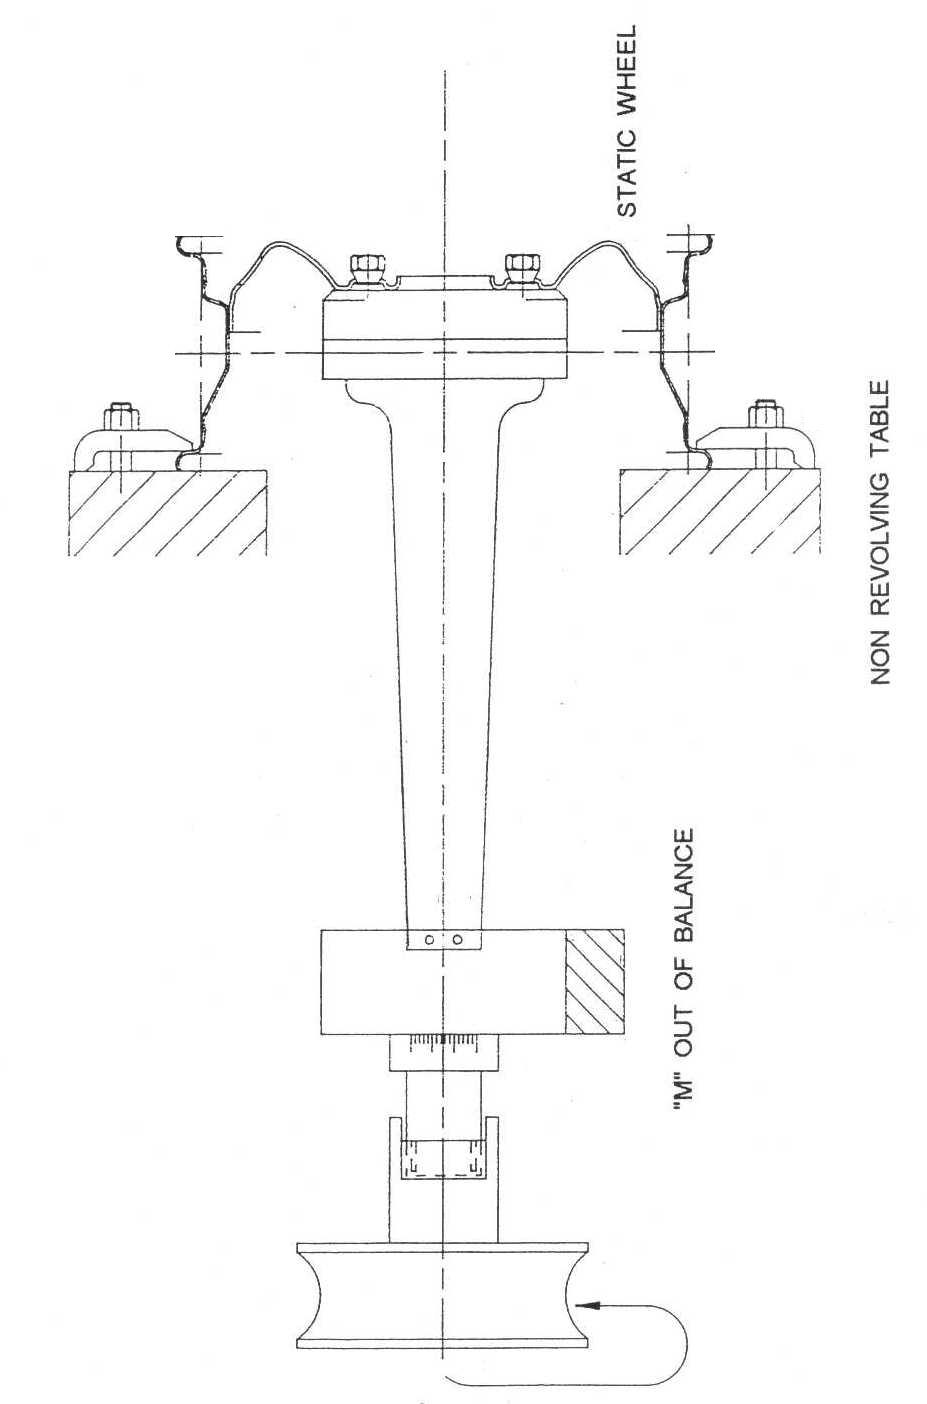
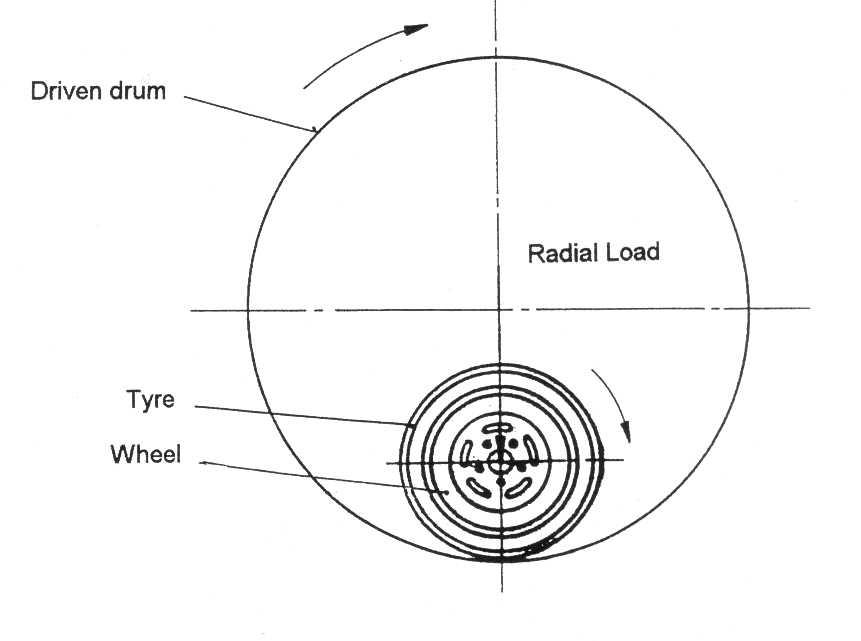
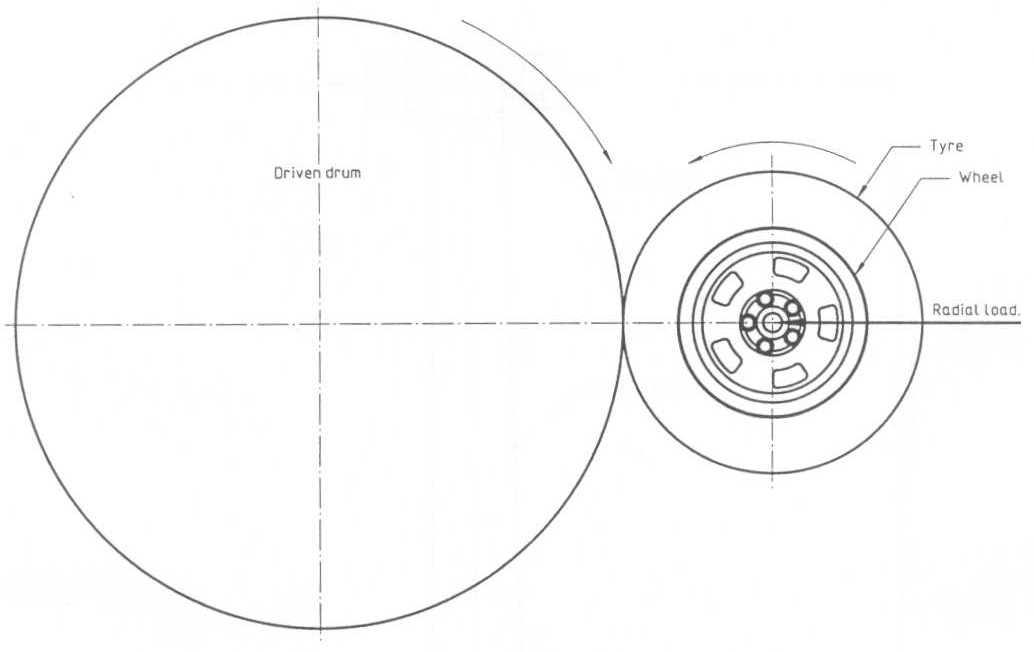
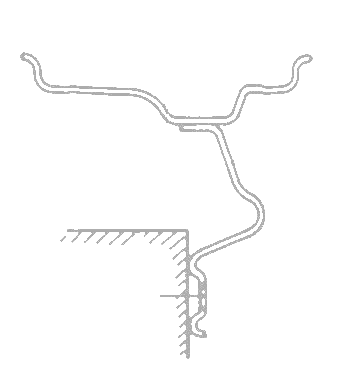

In [21]:
all_chunks

In [10]:
agent_image = ImageDisplayAgent()
chunks_imageS=agent_image.validate_images("What are the dimensions of the regulatory catwalk mannequins?",chunks_image)

In [16]:
chunking_table

NameError: name 'chunking_table' is not defined

[{'url': '',
  'description': 'Image page 84 - ### Analyse de l\'Image\n\n#### Type de Contenu\n- **Graphique** : Le contenu visuel est un graphique technique.\n\n#### Éléments Visuels Principaux\n- **Dimensions et Mesures** : Le graphique montre des dimensions spécifiques en millimètres (mm).\n- **Annotions** : Les lettres "G" et "F" marquent des points spécifiques sur le graphique.\n- **Lignes et Flèches** : Des lignes et flèches indiquent les mesures et les directions des dimensions.\n\n#### Texte Significatif Présent dans l\'Image\n- **Titre** : "Figure 10 - Permitted intrusion at shoulder height (dimensions in mm)"\n- **Description** : "Transversal section of the minimum available space at shoulder height for a seat adjacent to the wall of the vehicle."\n- **Annotations** :\n  - "G = 225 mm if continuous seat"\n  - "G = 250 mm if individual seat"\n  - "G = 200 mm for vehicles less than 2.35 m wide"\n\n#### Relation avec le Contenu Global du Document\n- **Contexte** : Cette figure 
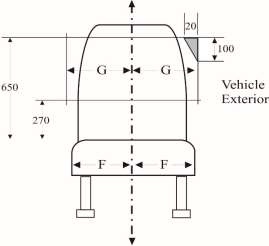
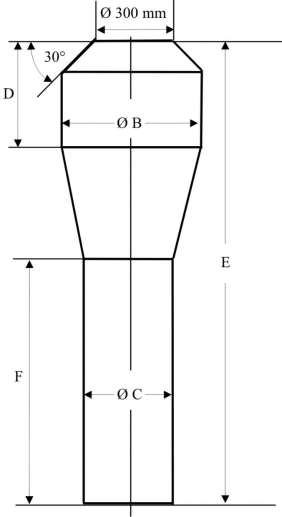

In [11]:
chunks_imageS

In [84]:
query = "what are the minimum distances required between passenger seats"

In [73]:
from rerankers import Reranker

In [5]:
list_docs =  []
for chunk in chunks_image:
    list_docs.append(chunk["metadata"])

In [ ]:
# PyMuPDF-only version (no poppler dependency)
from dataclasses import dataclass
from typing import Dict, List, Tuple

from PIL import Image

@dataclass
class Chunk:
    """Container for a single visual chunk extracted from a PDF page."""
    source: str  # "page", "embedded_image", "grid"
    page_number: int  # 1‑based index
    bbox: Tuple[int, int, int, int]  # (x0, y0, x1, y1) in page pixel coords
    image_b64: str  # data‑URI of the chunk image
    full_page_b64: str  # data‑URI of the rasterised full page
    dims: Tuple[int, int]  # (width, height) of the chunk in pixels

    def to_json(self) -> Dict:
        return asdict(self)

def _to_data_uri(pil_img: Image.Image, fmt: str = "PNG") -> str:
    """Convert pil_img to a base64 data: URI."""
    buffer = io.BytesIO()
    pil_img.save(buffer, format=fmt)
    b64 = base64.b64encode(buffer.getvalue()).decode()
    return f"data:image/{fmt.lower()};base64,{b64}"

def _iter_grid(w: int, h: int, patch: int, stride: int) -> List[Tuple[int, int, int, int]]:
    """Yield sliding‑window boxes over an (h, w) canvas."""
    boxes = []
    for y in range(0, h, stride):
        for x in range(0, w, stride):
            boxes.append((x, y, min(x + patch, w), min(y + patch, h)))
    return boxes

def pdf_to_image_chunks_simple(
    pdf_path: str,
    dpi: int = 300,
    patch_sizes: Tuple[int, ...] = (512,),
    overlap: float = 0.25,
    min_patch_area_ratio: float = 0.005,
    filter_black: bool = True,
) -> List[Dict]:
    """Extracts visual chunks from pdf_path using only PyMuPDF (no poppler dependency)."""
    
    if not os.path.exists(pdf_path):
        raise FileNotFoundError(pdf_path)

    # Open PDF
    doc = fitz.open(pdf_path)
    
    chunks: List[Chunk] = []

    for i, page_fitz in enumerate(doc, start=1):
        # Convert page to image using PyMuPDF
        mat = fitz.Matrix(dpi/72, dpi/72)  # transformation matrix for DPI
        pix = page_fitz.get_pixmap(matrix=mat)
        
        # Convert to PIL Image
        img_data = pix.tobytes("png")
        pil_page = Image.open(io.BytesIO(img_data))
        
        w, h = pil_page.size
        page_area = w * h

        # Create downscaled full page preview
        page_preview = pil_page.copy()
        if max(w, h) > 1024:
            scale = 1024 / max(w, h)
            page_preview = page_preview.resize((int(w * scale), int(h * scale)), Image.BILINEAR)
        full_page_b64 = _to_data_uri(page_preview)

        def _add_chunk(src: str, bbox: Tuple[int, int, int, int]):
            x0, y0, x1, y1 = bbox
            pil_crop = pil_page.crop((x0, y0, x1, y1))

            if filter_black:
                try:
                    extrema = pil_crop.convert("RGB").getextrema()
                    if all(ch_max == 0 for (_, ch_max) in extrema):
                        return
                except:
                    pass

            chunk_b64 = _to_data_uri(pil_crop)
            chunks.append(
                Chunk(
                    source=src,
                    page_number=i,
                    bbox=bbox,
                    image_b64=chunk_b64,
                    full_page_b64=full_page_b64,
                    dims=(x1 - x0, y1 - y0),
                )
            )

        # Extract embedded images
        image_list = page_fitz.get_images()
        for img_index, img in enumerate(image_list):
            xref = img[0]
            base_image = doc.extract_image(xref)
            
            if not base_image or base_image.get('mask'):
                continue
                
            if base_image['width'] < 50 or base_image['height'] < 50:
                continue

            try:
                img_data = io.BytesIO(base_image["image"])
                pil_img = Image.open(img_data)
                
                if filter_black and all(max(channel) == 0 for channel in pil_img.getextrema()):
                    continue

                chunk_b64 = _to_data_uri(pil_img)
                chunks.append(
                    Chunk(
                        source="embedded_image",
                        page_number=i,
                        bbox=(0, 0, base_image['width'], base_image['height']),
                        image_b64=chunk_b64,
                        full_page_b64=full_page_b64,
                        dims=(base_image['width'], base_image['height']),
                    )
                )
            except Exception:
                continue

        # Grid-based chunking
        for patch in patch_sizes:
            stride = int(patch * (1 - overlap))
            for bx in _iter_grid(w, h, patch, stride):
                if (bx[2] - bx[0]) * (bx[3] - bx[1]) >= min_patch_area_ratio * page_area:
                    _add_chunk("grid", bx)

        # Full page chunk
        if (w * h) >= min_patch_area_ratio * page_area:
            _add_chunk("page", (0, 0, w, h))

    doc.close()
    return [ck.to_json() for ck in chunks]


In [ ]:
# Test the simplified function
pdf_path = r"C:\Projet_AI\Assistant_regulation\Data\R107 - 10 series.pdf"
all_chunks = pdf_to_image_chunks_simple(pdf_path)

print(f"Extracted {len(all_chunks)} chunks")
for i, chunk in enumerate(all_chunks[:3]):  # Show first 3 chunks
    print(f"Chunk {i+1}: source={chunk['source']}, page={chunk['page_number']}, dims={chunk['dims']}")
    
print(f"\nTotal chunks by type:")
chunk_types = {}
for chunk in all_chunks:
    chunk_types[chunk['source']] = chunk_types.get(chunk['source'], 0) + 1
print(chunk_types)


In [ ]:
# Test the updated function (no poppler required!)
pdf_path = r"C:\Projet_AI\Assistant_regulation\Data\R107 - 10 series.pdf"
all_chunks = pdf_to_image_chunks_simple(pdf_path)

print(f"Extracted {len(all_chunks)} chunks")
for i, chunk in enumerate(all_chunks[:3]):  # Show first 3 chunks
    print(f"Chunk {i+1}: source={chunk['source']}, page={chunk['page_number']}, dims={chunk['dims']}")
    
print(f"\nTotal chunks by type:")
chunk_types = {}
for chunk in all_chunks:
    chunk_types[chunk['source']] = chunk_types.get(chunk['source'], 0) + 1
print(chunk_types)


[{'height': 105,
  'image_url': '',
  'page': 36,
  'type': 'image',
  'width': 527},
 {'height': 83,
  'image_url': '',
  'page': 37,
  'type': 'image',
  'width': 495},
 {'height': 246,
  'image_url': '',
  'page': 84,
  'type': 'image',
  'width': 269},
 {'height': 241,
  'image_url': '',
  'page': 86,
  'type': 'image',
  'width': 407},
 {'height': 296,
  'image_url': '',
  'page': 78,
  'type': 'image',
  'width': 449},
 {'height': 517,
  'image_url': '',
  'page': 79,
  'type': 'image',
  'width': 282},
 {'height': 746,
  'image_url': '',
  'page': 81,
  'type': 'image',
  'width': 636},
 {'height': 319,
  'image_url': '',
  'page': 94,
  'type': 'image',
  'width': 485},
 {'height': 260,
  'image_url': '',
  'page': 98,
  'type': 'image',
  'width': 471},
 {'height': 259,
  'image_url': '',
  'page': 92,
  'type': 'image',
  'width': 412}]
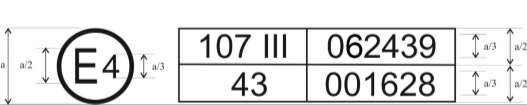
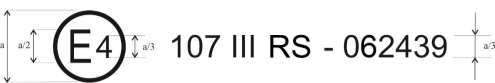
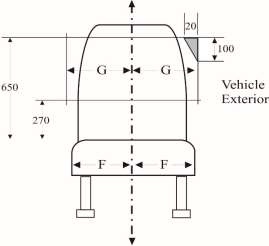
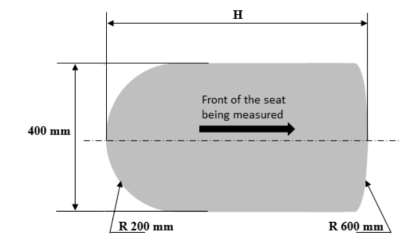
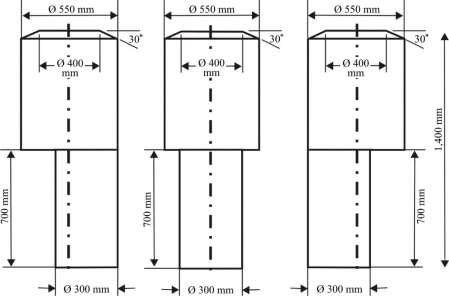
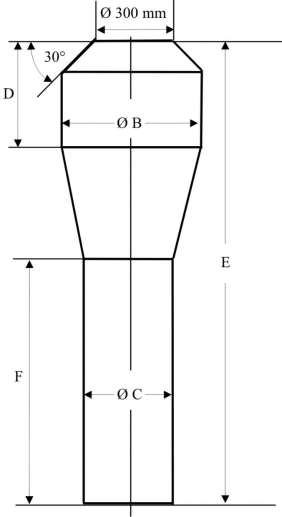
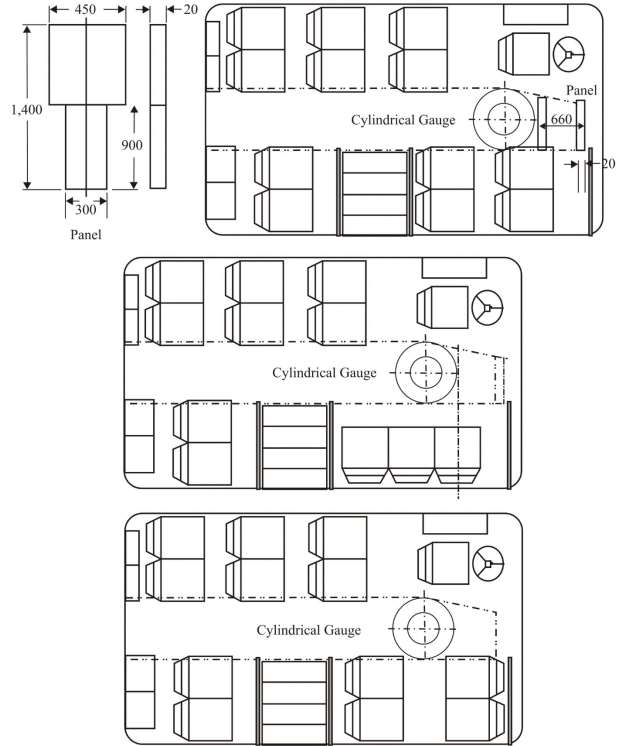
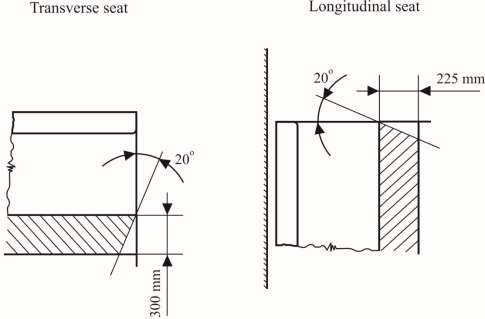
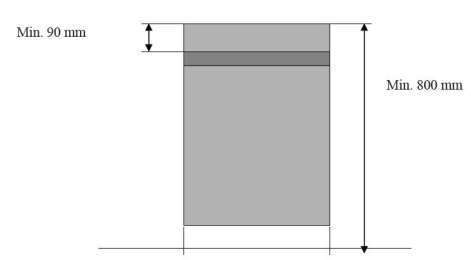
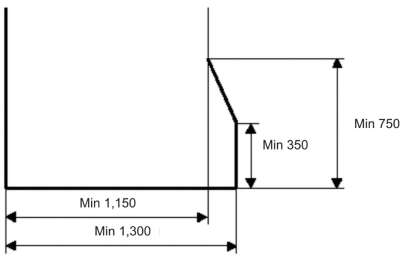

In [6]:
list_docs

In [ ]:
list_ids = []
for chunk in chunks_image:
    print(chunk.keys())

In [ ]:
ranker = Reranker('flashrank')

In [ ]:
results = ranker.rank(query=query, docs=list_docs)
results

In [67]:
results[5].score, results[4].doc_id

(np.float32(0.9907399), 9)

## Verification et best chunks 

In [16]:
agent_verif = VerifAgent(model_name="mistral", temperature=0.0,llm_provider="ollama")

In [ ]:
# verify the relevance of the retrieved chunks
chunks_verif = agent_verif.verify_chunks("what are the minimum distances required between passenger seats", chunks_table)

In [ ]:
# test the relevance of the retrieved chunks
for chunk in chunks_table:
    chunks_verif_test = agent_verif.test_verification("The number of emergency exits for a vehicle with 116 passengers?", chunk)

In [ ]:
chunks_verif

## ORCHESTROR

In [ ]:
simple_response

In [12]:
from src.Planning_pattern.orchestrator import OrchestratorModule

créer moi un fichier orchestrator_3.py,  il sera comme precedant mais seul dirence ce que   tu va faire la recherche dans les trois base texte, image, et table   en suite tu va creer trois generateur de reponse (gen_text "genere une reponse  apartire de la collection text si pertinent", gen_table "genere une reponse  apartire de la collection text si pertinent", gen_image "genere une reponse  apartire de la collection image  (utilise urlimage, urlpage et la description) si pertinent  avec un model multimodal pixtral"),  en  centralise tout et donne une reponse finale.

In [13]:
# Initialize the orchestrator
orchestrator = OrchestratorModule(
    llm_provider="mistral",  # or "mistral"
    model_name="mistral-large-latest",     # or "mistral-medium" if using mistral
    model_name_verif="mistral",
    llm_verif="ollama",
    temperature=0.1,
    agent_verif=False
)

In [7]:
# Process a query
def ask_regulation_question(query):
    print(f"Question: {query}")
    print("Processing...")
    
    # Get response from orchestrator
    response = orchestrator.process_query(query)
    
    # Print the answer
    print("\nAnswer:")
    print(response.answer)
    
    # Print sources
    if response.supporting_evidence:
        print("\nSources:")
        for i, source in enumerate(response.supporting_evidence):
            print(f"Source {i+1}: {source['regulation']}, Section {source['section']}")
    
    # Indicate if images are available
    if response.images:
        print(f"\n{len(response.images)} relevant images available")
    
    # Indicate if tables are available
    if response.tables:
        print(f"\n{len(response.tables)} relevant tables available")
    
    return response

In [10]:
query = "The number of emergency exits for a vehicle with 116 passengers?"

In [11]:
ask_regulation_question(query)

2025-03-28 17:53:37,102 - src.Planning_pattern.orchestrator - INFO - Analyzing query: The number of emergency exits for a vehicle with 116 passengers?


Question: The number of emergency exits for a vehicle with 116 passengers?
Processing...


2025-03-28 17:53:39,291 - src.Planning_pattern.orchestrator - INFO - Executing retrieval operations
2025-03-28 17:53:43,960 - src.Planning_pattern.orchestrator - INFO - Skipping verification (disabled)
2025-03-28 17:53:43,961 - src.Planning_pattern.orchestrator - INFO - Generating final response


{'ids': [['R107_S20_S20-3', 'R107_S23', 'R107_S23_S23-1', 'R107_S20_S20-2', 'R107_S21_S21-2', 'R107_S18_S18-3', 'R107_S26_S26-1', 'R107_S26', 'R107_S19_S19-4', 'R107_S26_S26-2', 'R107_S24_S24-2', 'R107_S19_S19-1', 'R107_S19', 'R107_S1_S1-5', 'R107_S23_S23-3', 'R107_S18_S18-4', 'R107_S23_S23-4', 'R107_S19_S19-2', 'R107_S21_S21-3', 'R107_S9_S9-2', 'R107_S2_S2-1', 'R107_S2', 'R107_S21_S21-4', 'R107_S25', 'R107_S25_S25-1', 'R107_S3_S3-4', 'R107_S18', 'R107_S18_S18-1', 'R107_S24', 'R107_S24_S24-1', 'R107_S31_S31-4', 'R107_S35_S35-1', 'R107_S35', 'R107_S1', 'R107_S1_S1-1', 'R107_S40_S40-3', 'R107_S14', 'R107_S14_S14-1', 'R107_S31_S31-3', 'R107_S20_S20-4', 'R107_S7', 'R107_S7_S7-1', 'R107_S6_S6-4', 'R107_S39_S39-4', 'R107_S12']], 'embeddings': None, 'documents': [['7.6.3.1. Vehicles of Class I, II or III shall meet the following requirements:\n7.6.3.1.1. Service doors shall have an aperture creating an access in accordance with the\nrequirements shown in paragraph 7.7.1. of this annex.\n7.6.3

### Simple orchestror

In [4]:
from src.Planning_pattern.orchestrator_2 import SimpleOrchestrator

In [5]:
# Initialisation sans vérification (plus rapide mais moins précis)
fast_orchestrator = SimpleOrchestrator(
    llm_provider="mistral",
    model_name="mistral-large-latest",
    enable_verification=False
)

2025-04-02 15:28:00,431 - src.Planning_pattern.orchestrator_2 - INFO - Traitement de la requête: What is the regulatory step height ?
2025-04-02 15:28:00,431 - src.Planning_pattern.orchestrator_2 - INFO - Recherche dans les sources...


{'ids': [['ed6d417b9bed', '228fa1e301bb', '960b87626a47', 'b99e054a384a', 'f8d4e5b56bd4', '96cf0c5d481c', 'a266ba9fb955', '698cd4ee19ca', '478b3565a3d4', 'a23a5ea7bac9', 'c0a59feca847', 'a4b0efda3e16', 'ce0c2b5dad02', '777ff36a73dc', 'f68e3e39a85b', '855dba923ab3', '5d187d27821b', 'b39894a5b650', '4d28e25ebee1', '04d9de170f39', '8ee84f316480', 'd282f1e6fc4a', '794735e6d788', '408b003c4798', '88add80cc9da', 'ec1e2a8cdffe', 'bc2c47508822', '25fceb420eb5', '3f4bc11242ee', '4236a9bae6e3']], 'embeddings': None, 'documents': [['7.7.5.2. (Reserved)\nEight per cent in the case of a vehicle of Class I, II or A, or\n12.5 per cent in the case of a vehicle of Classes III and B, and\nIn the transversal direction, 5 per cent for all classes.\nSteps (see Annex 4, Figure 8)\nThe  maximum and  minimum  height,  and  the  minimum  depth,  of  steps  for passengers  at  service  and  emergency  doors,  and  within  the  vehicle,  are specified in Annex 4, Figure 8.\n7.7.7.1.1.\nAny transition from a sunk
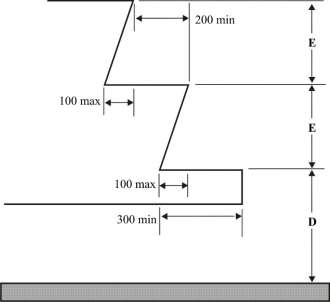
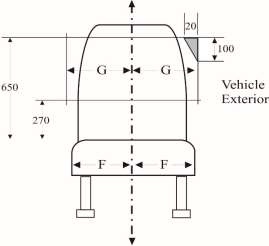
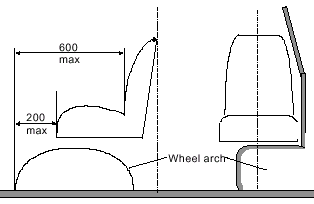
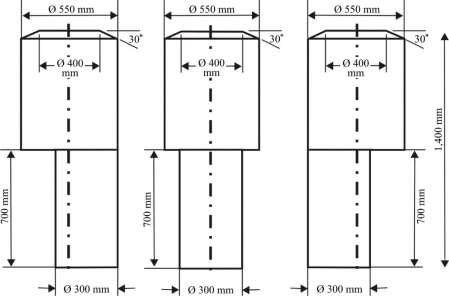

2025-04-02 15:28:03,385 - src.Planning_pattern.orchestrator_2 - INFO - Vérification des chunks désactivée, utilisation directe...
2025-04-02 15:28:03,386 - src.Planning_pattern.orchestrator_2 - INFO - Validation des images...
2025-04-02 15:28:05,541 - src.Planning_pattern.orchestrator_2 - INFO - Préparation du contexte pour génération...
2025-04-02 15:28:05,541 - src.Planning_pattern.orchestrator_2 - INFO - Génération de la réponse...


In [6]:
# Traitement d'une requête (sans images ni tableaux)
simple_response = fast_orchestrator.process_query(
    "What is the regulatory step height ?",
    use_images=True,
    use_tables=True
)

{'answer': 'La hauteur réglementaire des marches, ou "regulatory step height," varie en fonction de la classe du véhicule et de la position de la marche. Voici les informations pertinentes extraites des sources fournies :\n\n1. **Hauteur de la première marche par rapport au sol :**\n   - Pour les véhicules de Classes I et A, la hauteur maximale de la première marche ne doit pas dépasser 250 mm.\n   - Pour les véhicules de Classes II, III et B, la hauteur maximale de la première marche ne doit pas dépasser 320 mm [Source 4].\n\n2. **Hauteur des autres marches :**\n   - Pour les véhicules de Classes I et A, la hauteur maximale des autres marches ne doit pas dépasser 200 mm.\n   - Pour les véhicules de Classes II, III et B, la hauteur maximale des autres marches ne doit pas dépasser 250 mm [Source 4].\n\n3. **Hauteur minimale des marches :**\n   - La hauteur minimale des marches est de 120 mm pour toutes les classes de véhicules [Tableau 2].\n\n4. **Profondeur minimale des marches :**\n  
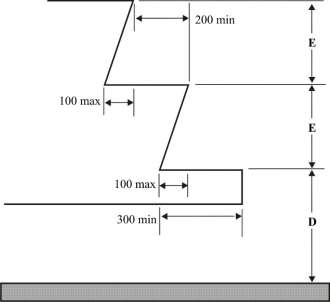

In [7]:
simple_response

In [ ]:
simple_response

In [9]:
from src.Planning_pattern.orchestrator_3 import Orchestrator3

In [10]:
orchestrator = Orchestrator3(
    llm_provider="mistral",           # LLM pour traitement texte et tableaux
    model_name="mistral-large-latest",             # Modèle pour traitement texte et tableaux
    img_llm_provider="mistral",      # LLM pour les images (multimodal)
    img_model_name="pixtral-12b-2409", # Modèle multimodal pour images
    enable_verification=False         # Activer la vérification des chunks
)

2025-04-01 11:25:11,490 - src.Planning_pattern.orchestrator_3 - INFO - Traitement de la requête: What are the dimensions of the regulatory Gangway  mannequins?
2025-04-01 11:25:11,491 - src.Planning_pattern.orchestrator_3 - INFO - Recherche dans les sources...


{'ids': [['3990ad818a2a', '3d2eba4bdcd6', '777ff36a73dc', 'e9dc33d5c277', 'ce0c2b5dad02', '9cf184aa0ade', 'a4163583f028', 'ec1e2a8cdffe', '88add80cc9da', 'e3b9efa1696e', '25fceb420eb5', '30be100a05a0', '0d3a1c98cb7e', '4722fa80fa5b', '774b0aaa564d', '47db02bb5d93', '8caece117fc3', 'ff7d0c5eb455', '0fd89140dcc4', '2728fdd3a3a2', 'b51823fb4d33', 'bb72c981b607', 'ed6d417b9bed', '250e310189ec', 'd2532951905b', '74ac247fdde8', '8ab883627a8d', 'cd7ad9975643', 'b99e054a384a', '769efb46f646']], 'embeddings': None, 'documents': [['Gangway mannequin\nI, Single deck.E (mm) = 1,800 5. I, Single deck.F (mm) = 1,020 5. , Single deck.Class = UD. , Single deck.B (mm) = 550. , Single deck.C (mm) = 450 2. , Single deck.D (mm) = 500. , Single deck.E (mm) = 1,680. , Single deck.F (mm) = 900. II, Single deck.Class = LD. II, Single deck.B (mm) = 550. II, Single deck.C (mm) = 350. II, Single deck.D (mm) = 500. II, Single deck.E (mm) = 1,800 5. II, Single deck.F (mm) = 1,020 1. , Single deck.Class = UD. , Sin
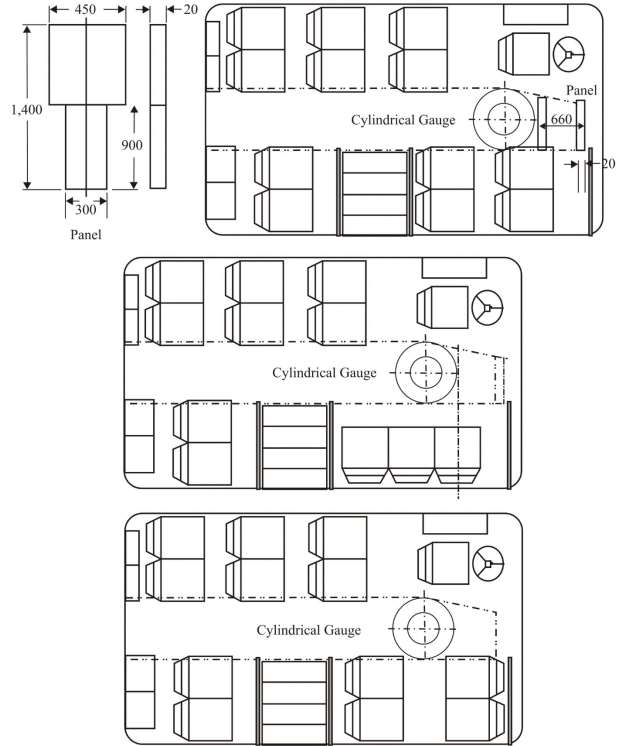
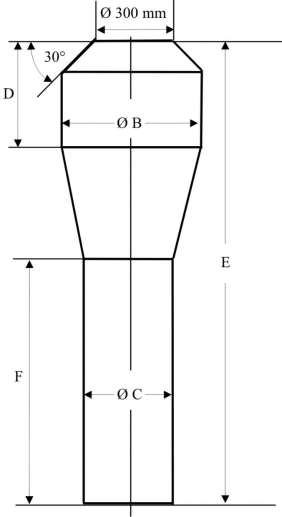
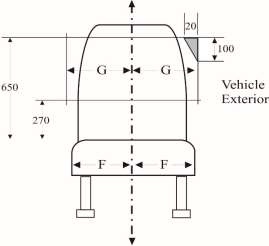
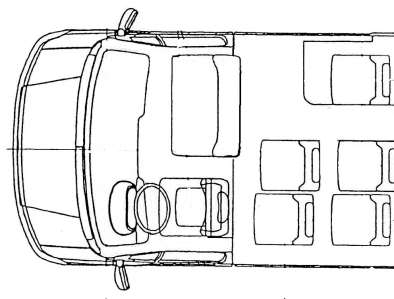

2025-04-01 11:25:11,917 - src.Planning_pattern.orchestrator_3 - INFO - Vérification des chunks désactivée, utilisation directe...
2025-04-01 11:25:11,917 - src.Planning_pattern.orchestrator_3 - INFO - Génération de réponse à partir du texte...


{'ids': [['9', '10', '18', '22']], 'embeddings': None, 'documents': [["nnex 4                           UN R. 107 – 10 seri \n1  The height of the upper cylinder and herewith the overall height may be reduced by 100 mm   in any part of the gangway to the rear of: \n  (a)  A transverse plane situated 1.5 m forward of the centre line of the rear axle (foremost rear     axle in the case of vehicles with more than one rear axle), and\n[['Single deck', None, None, None, None, None, None], ['Class', None, 'B (mm)', 'C (mm)', 'D (mm)', 'E (mm)', 'F (mm)'], ['A', None, '550', '350', '5001', '1,9001', '900'], ['B', None, '450', '300', '300', '1,500', '900'], ['I', None, '550', '4502', '5001', '1,9001', '900'], ['II', None, '550', '350', '5001', '1,9001', '900'], ['III', None, '450', '3003', '5001', '1,9001,4', '9004'], ['Double-deck', None, None, None, None, None, None], ['I', 'LD', '550', '4502', '500', '1,8005', '1,0205'], [None, 'UD', '550', '4502', '500', '1,680', '900'], ['II', 'LD', '550'

2025-04-01 11:25:26,224 - src.Planning_pattern.orchestrator_3 - INFO - Génération de réponse à partir des tableaux...
2025-04-01 11:25:30,315 - src.Planning_pattern.orchestrator_3 - INFO - Génération de réponse à partir des images...
2025-04-01 11:25:38,943 - src.Planning_pattern.orchestrator_3 - INFO - Centralisation des réponses...


In [18]:
# Traitement d'une requête
response = orchestrator.process_query(
    "What are the dimensions of the regulatory Gangway  mannequins?",
    use_images=True,
    use_tables=True,
    top_k=5  # Nombre de chunks à récupérer par source
)

In [ ]:
# Affichage des résultats
print("\n=== RÉPONSE FINALE ===")
print(response["answer"])

print("\n=== RÉPONSES PARTIELLES ===")
if "text" in response["partial_responses"]:
    print("\nRéponse textuelle:")
    print(response["partial_responses"]["text"])

if "table" in response["partial_responses"]:
    print("\nRéponse tabulaire:")
    print(response["partial_responses"]["table"])

if "image" in response["partial_responses"]:
    print("\nRéponse visuelle:")
    print(response["partial_responses"]["image"])

créer moi un fichier orchestrator_3.py,  il sera comme precedant mais seul dirence ce que   tu va faire la recherche dans les trois base texte, image, et table   en suite tu va creer trois generateur de reponse (gen_text "genere une reponse  apartire de la collection text si pertinent", gen_table "genere une reponse  apartire de la collection text si pertinent", gen_image "genere une reponse  apartire de la collection image  (utilise urlimage, urlpage et la description) si pertinent  avec un model multimodal pixtral"),  en  centralise tout et donne une reponse finale.

In [5]:
pip install 'git+https://github.com/facebookresearch/detectron2.git'

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: "'git+https://github.com/facebookresearch/detectron2.git'": Expected package name at the start of dependency specifier
    'git+https://github.com/facebookresearch/detectron2.git'
    ^


In [24]:
# PyMuPDF-only version (no poppler dependency)
import base64
import io
from dataclasses import dataclass, asdict
from typing import Dict, List, Tuple

import fitz  # PyMuPDF for PDF access
from PIL import Image

@dataclass
class Chunk:
    """Container for a single visual chunk extracted from a PDF page."""
    source: str  # "page", "embedded_image", "grid"
    page_number: int  # 1‑based index
    bbox: Tuple[int, int, int, int]  # (x0, y0, x1, y1) in page pixel coords
    image_b64: str  # data‑URI of the chunk image
    full_page_b64: str  # data‑URI of the rasterised full page
    dims: Tuple[int, int]  # (width, height) of the chunk in pixels

    def to_json(self) -> Dict:
        return asdict(self)

def _to_data_uri(pil_img: Image.Image, fmt: str = "PNG") -> str:
    """Convert pil_img to a base64 data: URI."""
    buffer = io.BytesIO()
    pil_img.save(buffer, format=fmt)
    b64 = base64.b64encode(buffer.getvalue()).decode()
    return f"data:image/{fmt.lower()};base64,{b64}"

def _iter_grid(w: int, h: int, patch: int, stride: int) -> List[Tuple[int, int, int, int]]:
    """Yield sliding‑window boxes over an (h, w) canvas."""
    boxes = []
    for y in range(0, h, stride):
        for x in range(0, w, stride):
            boxes.append((x, y, min(x + patch, w), min(y + patch, h)))
    return boxes

def pdf_to_image_chunks_simple(
    pdf_path: str,
    dpi: int = 300,
    patch_sizes: Tuple[int, ...] = (512,),
    overlap: float = 0.25,
    min_patch_area_ratio: float = 0.005,
    filter_black: bool = True,
) -> List[Dict]:
    """Extracts visual chunks from pdf_path using only PyMuPDF (no poppler dependency)."""
    
    if not os.path.exists(pdf_path):
        raise FileNotFoundError(pdf_path)

    # Open PDF
    doc = fitz.open(pdf_path)
    
    chunks: List[Chunk] = []

    for i, page_fitz in enumerate(doc, start=1):
        # Convert page to image using PyMuPDF
        mat = fitz.Matrix(dpi/72, dpi/72)  # transformation matrix for DPI
        pix = page_fitz.get_pixmap(matrix=mat)
        
        # Convert to PIL Image
        img_data = pix.tobytes("png")
        pil_page = Image.open(io.BytesIO(img_data))
        
        w, h = pil_page.size
        page_area = w * h

        # Create downscaled full page preview
        page_preview = pil_page.copy()
        if max(w, h) > 1024:
            scale = 1024 / max(w, h)
            page_preview = page_preview.resize((int(w * scale), int(h * scale)), Image.BILINEAR)
        full_page_b64 = _to_data_uri(page_preview)

        def _add_chunk(src: str, bbox: Tuple[int, int, int, int]):
            x0, y0, x1, y1 = bbox
            pil_crop = pil_page.crop((x0, y0, x1, y1))

            if filter_black:
                try:
                    extrema = pil_crop.convert("RGB").getextrema()
                    if all(ch_max == 0 for (_, ch_max) in extrema):
                        return
                except:
                    pass

            chunk_b64 = _to_data_uri(pil_crop)
            chunks.append(
                Chunk(
                    source=src,
                    page_number=i,
                    bbox=bbox,
                    image_b64=chunk_b64,
                    full_page_b64=full_page_b64,
                    dims=(x1 - x0, y1 - y0),
                )
            )

        # Extract embedded images
        image_list = page_fitz.get_images()
        for img_index, img in enumerate(image_list):
            xref = img[0]
            base_image = doc.extract_image(xref)
            
            if not base_image or base_image.get('mask'):
                continue
                
            if base_image['width'] < 50 or base_image['height'] < 50:
                continue

            try:
                img_data = io.BytesIO(base_image["image"])
                pil_img = Image.open(img_data)
                
                if filter_black and all(max(channel) == 0 for channel in pil_img.getextrema()):
                    continue

                chunk_b64 = _to_data_uri(pil_img)
                chunks.append(
                    Chunk(
                        source="embedded_image",
                        page_number=i,
                        bbox=(0, 0, base_image['width'], base_image['height']),
                        image_b64=chunk_b64,
                        full_page_b64=full_page_b64,
                        dims=(base_image['width'], base_image['height']),
                    )
                )
            except Exception:
                continue

        # Grid-based chunking
        for patch in patch_sizes:
            stride = int(patch * (1 - overlap))
            for bx in _iter_grid(w, h, patch, stride):
                if (bx[2] - bx[0]) * (bx[3] - bx[1]) >= min_patch_area_ratio * page_area:
                    _add_chunk("grid", bx)

        # Full page chunk
        if (w * h) >= min_patch_area_ratio * page_area:
            _add_chunk("page", (0, 0, w, h))

    doc.close()
    return [ck.to_json() for ck in chunks]


In [ ]:
# Fix for Windows file path and layoutparser issue
import json

pdf = "C:/Projet_AI/Assistant_regulation/Data/R107 - 10 series.pdf"
dpi = 300
result = pdf_to_image_chunks(
            pdf,
            model_name=None, 
            dpi=dpi
        )
json.dump(result, sys.stdout, indent=2, ensure_ascii=False)

In [ ]:
import os
print("Current working directory:", os.getcwd())
print("Contents of current directory:")
for item in os.listdir('.'):
    print(f"  {item}")